# Lab: Regression

## Exercise 4: Multivariate Linear Regression on real data

> For this exercise, you will use a data set containing the overall number of Facebook friends. The data is provided in the file number_of_friends.csv. A simple time series is given. The amount of friends is to be forecasted based on previous values that have been measured monthly. The CURRENT FRIENDS column contains the target variable $y$. The PREVIOUS FRIENDS and PREVIOUS INCREASE columns contain the input variables. PREVIOUS FRIENDS represents the amount of friends for the previous month. PREVIOUS INCREASE represents the increase of friends that has been achieved for the previous month compared to the month before. The YEAR and MONTH columns are indices and not relevant for the following exercise.

### Imports

In [1]:
import numpy as np
from sklearn.linear_model import SGDRegressor
import matplotlib.pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Read the data

In [2]:
df = pd.read_csv('./number_of_friends.csv', sep="\t")
df.head(5)

,YEAR,MONTH,CURRENT_FRIENDS,PREVIOUS FRIENDS,PREVIOUS_INCREASE
0,2008,10,42,26,26
1,2008,11,48,42,16
2,2008,12,56,48,6
3,2009,1,59,56,8
4,2009,2,61,59,3


### Plot the data

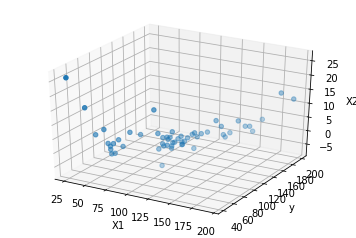

In [3]:
y = df['CURRENT_FRIENDS'].values
X = df[['PREVIOUS FRIENDS', 'PREVIOUS_INCREASE']].values
#X1 = df['PREVIOUS FRIENDS'].values
#X2 = df['PREVIOUS_INCREASE'].values

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
#ax.scatter(X1,y,X2)
ax.scatter(X[:,0],y,X[:,1])
ax.set_xlabel("X1")
ax.set_ylabel("y")
ax.set_zlabel("X2")
plt.show()

### Split the data into training and test data by applying cross-validation

> As before, use cross validation.train_test_split() to divide the data set in a training and test set.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=0)

### Apply multivariate linear regression and do the forecast

In [5]:
clf = SGDRegressor(max_iter = 1000, penalty = 'none', learning_rate = 'invscaling', eta0 = 0.00001)
clf.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=1e-05,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='none',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

### Question 1: What are the coefficients and intercept

In [6]:
b = clf.intercept_
w = clf.coef_
w1 = w[0]
w2 = w[1]
print "Intercept:", b
print "Coefficients:", w

Intercept: [0.01242595]
Coefficients: [1.0182387  0.33235001]


### Question 2: What do the regression coefficients say about the weight of the input variables and the relations of the input variables to the target variable?

very high correlation

### Predict for the test and calculated set the mean squared error

In [7]:
#y_predicted = map(lambda x : x*w + b, X_test)
y_predicted = w1*X_test[:,0] + w2*X_test[:,1] + b
mse = np.mean((y_predicted - y_test)**2)
print "mse:", mse

mse: 6.434011151445632
